In [112]:
import warnings
# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Importing the relevant libraries

In [113]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [114]:
raw_data = pd.read_csv('1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [115]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [116]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Dealing with missing values

In [117]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [118]:
data_no_mv = data.dropna(axis=0) #data with no missing values

In [119]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring the PDFs

<Axes: xlabel='Price', ylabel='Density'>

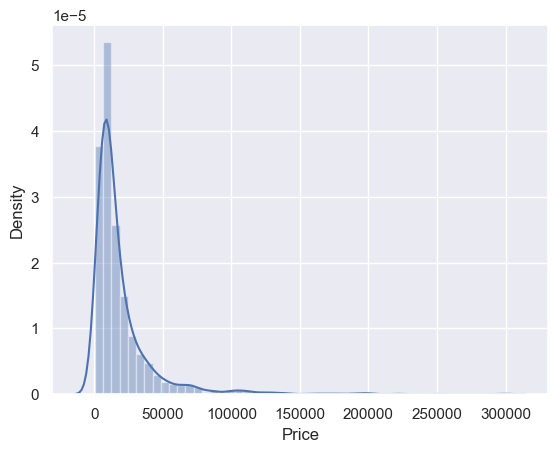

In [120]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [121]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


<Axes: xlabel='Mileage', ylabel='Density'>

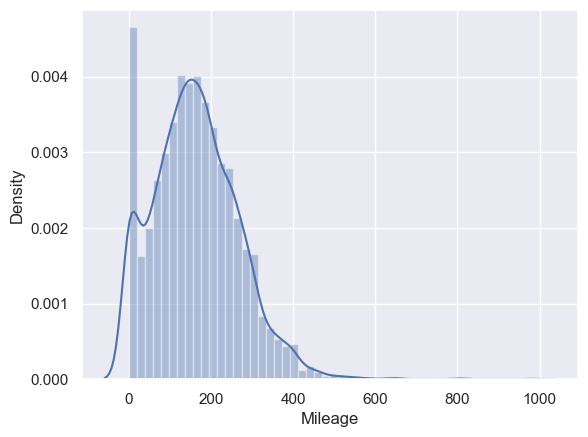

In [122]:
sns.distplot(data_no_mv['Mileage'])

In [123]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<Axes: xlabel='Mileage', ylabel='Density'>

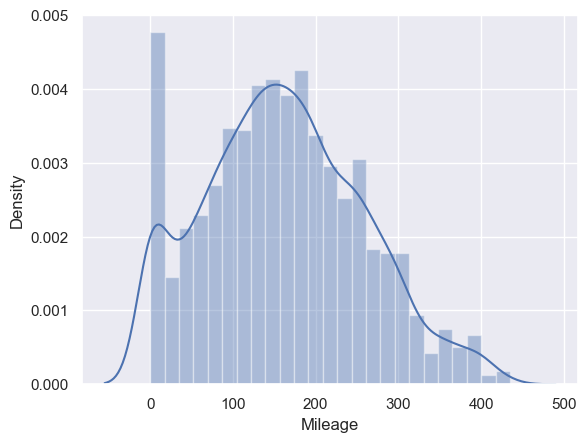

In [124]:
sns.distplot(data_2['Mileage'])

<Axes: xlabel='EngineV', ylabel='Density'>

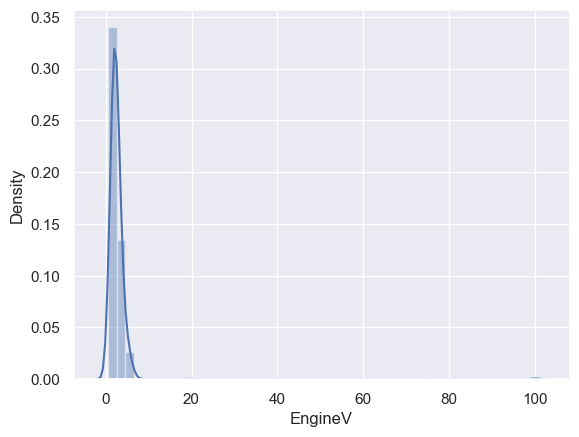

In [125]:
sns.distplot(data_no_mv['EngineV'])

In [126]:
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Density'>

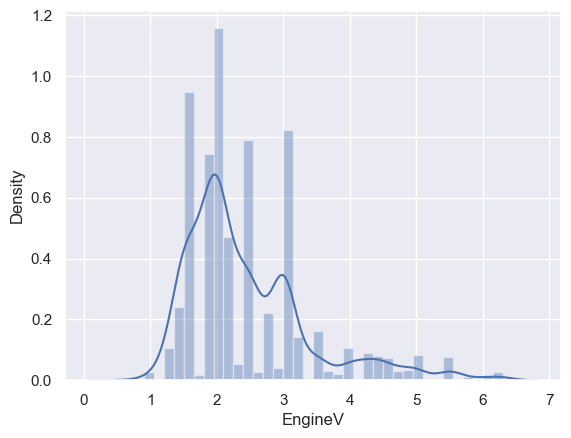

In [127]:
sns.distplot(data_3['EngineV'])

<Axes: xlabel='Year', ylabel='Density'>

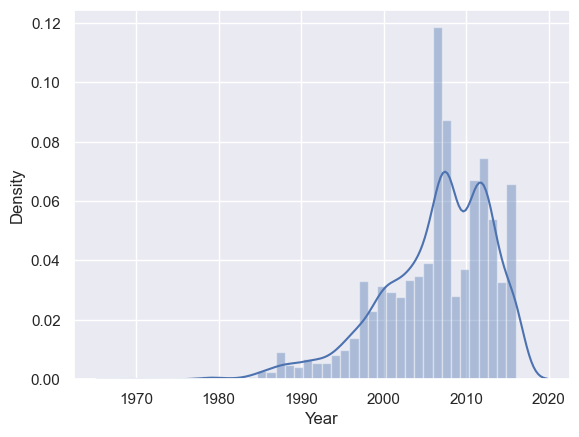

In [128]:
sns.distplot(data_no_mv['Year'])

In [129]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Density'>

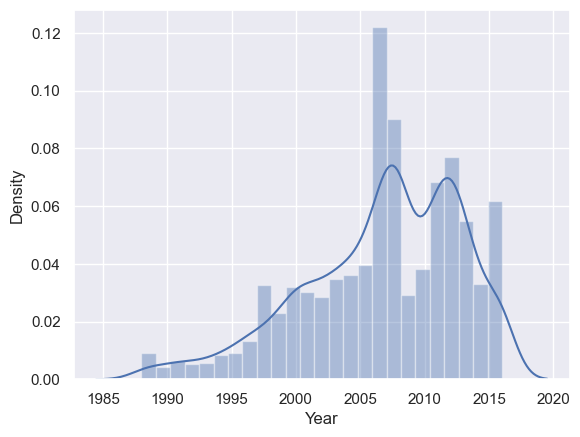

In [130]:
sns.distplot(data_4['Year'])

In [131]:
data_cleaned = data_4.reset_index(drop=True)

In [132]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


### Checking the OLS Assumption

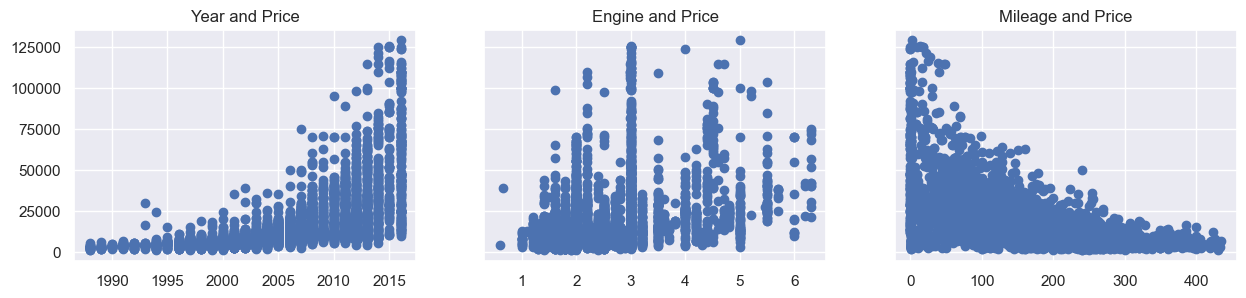

In [133]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Year and Price')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Engine and Price')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Price')
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

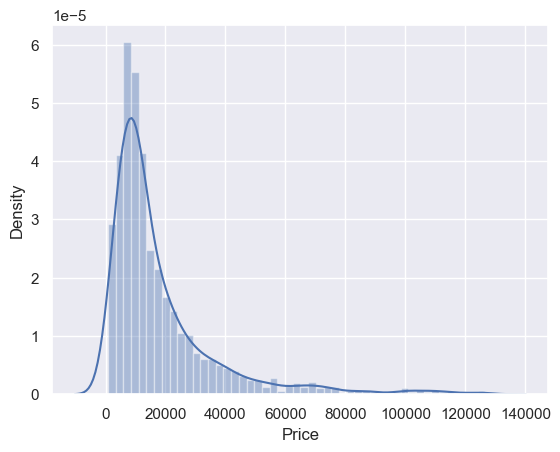

In [134]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumption

In [135]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


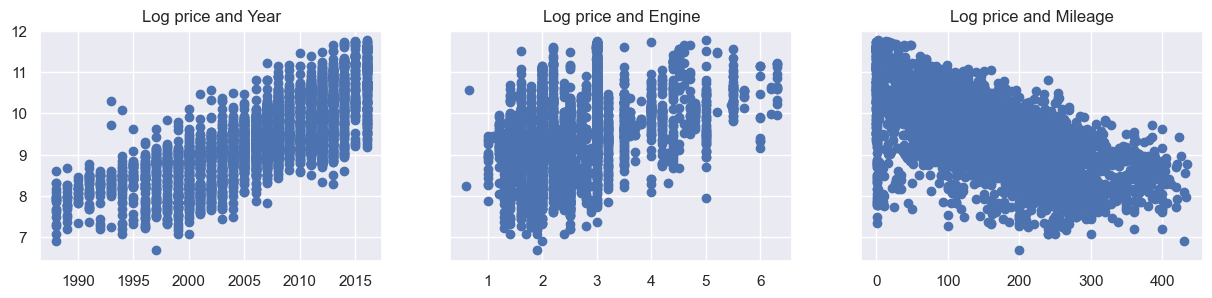

In [136]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log_price'])
ax1.set_title('Log price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log_price'])
ax2.set_title('Log price and Engine')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log_price'])
ax3.set_title('Log price and Mileage')
plt.show()

In [137]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
count,3867,3867,3867.00,3867.00,3867,3867,3867.00,3867.00
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,848,1467,NaN,NaN,1807,3505,NaN,NaN
mean,NaN,NaN,160.54,2.45,NaN,NaN,2006.71,9.42
std,NaN,NaN,95.63,0.95,NaN,NaN,6.10,0.88
min,NaN,NaN,0.00,0.60,NaN,NaN,1988.00,6.68
25%,NaN,NaN,91.00,1.80,NaN,NaN,2003.00,8.88
50%,NaN,NaN,157.00,2.20,NaN,NaN,2008.00,9.37
75%,NaN,NaN,225.00,3.00,NaN,NaN,2012.00,9.99


### Multicollinearity

In [138]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_price'], dtype=object)

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [140]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1) #removing year since its too coorelated with what we're working with
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_price
0,BMW,sedan,277,2.00,Petrol,yes,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,9.50
3,Audi,crossover,240,4.20,Petrol,yes,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,9.81
...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.50,Diesel,yes,9.35
3863,Toyota,sedan,35,1.60,Petrol,yes,9.79
3864,Mercedes-Benz,sedan,9,3.00,Diesel,yes,11.74
3865,BMW,sedan,1,3.50,Petrol,yes,8.78


### Create Dummy Variable

In [141]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True).astype(float)
data_with_dummies

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.00,2.00,8.34,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
1,427.00,2.90,8.97,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,358.00,5.00,9.50,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
3,240.00,4.20,10.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
4,120.00,2.00,9.81,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163.00,2.50,9.35,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3863,35.00,1.60,9.79,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
3864,9.00,3.00,11.74,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
3865,1.00,3.50,8.78,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00


### Rearrage a bit

In [142]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [143]:
cols = ['Log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [144]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00
1,8.97,427.00,2.90,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
2,9.50,358.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00
3,10.04,240.00,4.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
4,9.81,120.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


## Linear Regression Model

### Declare the inputs and the targets

In [145]:
targets = data_preprocessed['Log_price']
inputs = data_preprocessed.drop(['Log_price'], axis=1)

### Scale the data

In [146]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs).get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [147]:
inputs_scaled = scaler.transform(inputs)

### Train and Test split

In [148]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size= 0.2, random_state=365) 

### Create a Regression

In [149]:
reg = LinearRegression()
reg.fit(x_train, y_train).get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [150]:
y_hat = reg.predict(x_train)

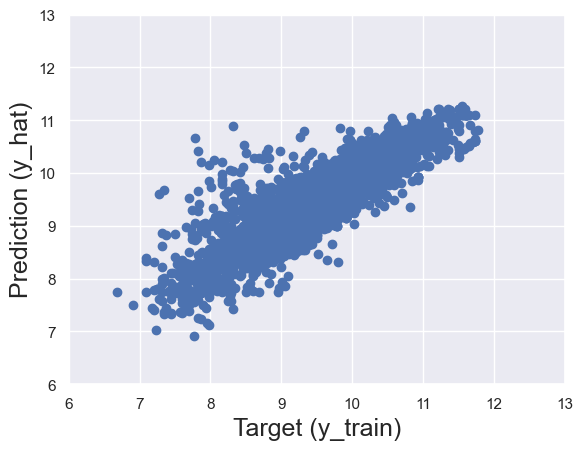

In [151]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size = 18)
plt.ylabel('Prediction (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'residual PDF')

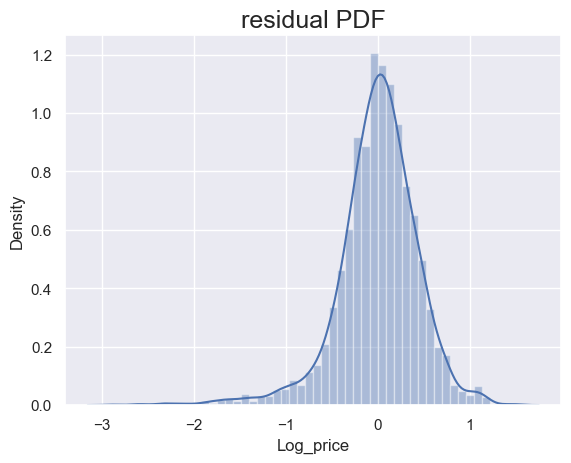

In [152]:
sns.distplot(y_train - y_hat)
plt.title("residual PDF", size = 18)

In [153]:
reg.score(x_train, y_train) #Good result, but could be better

0.744996578792662

### Finding the weights and bias

In [154]:
reg.intercept_

9.415239458021299

In [155]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [156]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.45
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.15
9,Body_other,-0.10


In [157]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [158]:
y_hat_test = reg.predict(x_test)

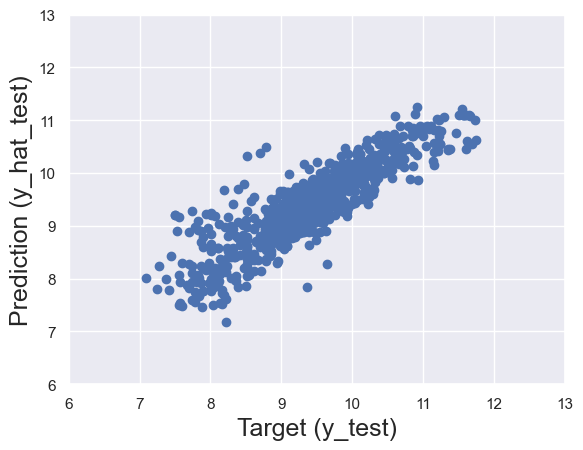

In [159]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Target (y_test)', size = 18)
plt.ylabel('Prediction (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [160]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


In [161]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.50,NaN
1,3499.26,7900.00
2,7553.29,NaN
3,7463.96,NaN
4,11353.49,NaN
5,21289.80,14200.00
6,20159.19,NaN
7,20349.62,NaN
8,11581.54,11950.00
9,33614.62,NaN


In [162]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0   7.74
1   7.94
2   7.82
3   8.76
4   9.12
Name: Log_price, dtype: float64

In [163]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
5,21289.80,20000.00
6,20159.19,38888.00
7,20349.62,16999.00
8,11581.54,12500.00
9,33614.62,41000.00


In [164]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [165]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [166]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
